In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784", version=1)
mnist.keys()
# data field contains the 0-255 number of each pixel. 70000 images and 784 pixels each (70000, 784)
# target field contains the number that the image represents

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [2]:
import numpy as np

x = np.array(mnist.data)
y = np.array(mnist.target)
print(x.shape)
print(y.shape)

(70000, 784)
(70000,)


Actual number: 5
<class 'str'>
<class 'numpy.uint8'>


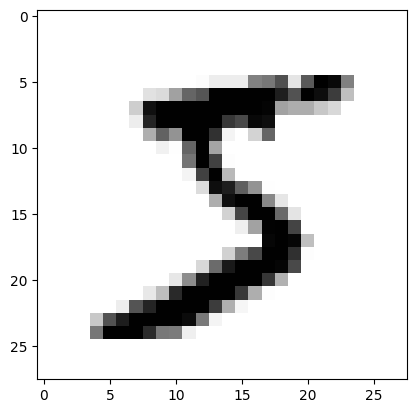

In [3]:
import matplotlib.pyplot as plt

some_digit = x[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap="binary")
print(f"Actual number: {y[0]}")
print(type(y[0]))

# casting y to int
y = y.astype("uint8")
print(type(y[0]))

In [4]:
# creating train and test set
x_train = x[:60000]
x_test = x[60000:]

y_train = y[:60000]
y_test = y[60000:]

In [5]:
# 5-detector : binary classifier
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier()
sgd_clf.fit(x_train, y_train_5)

SGDClassifier()

In [6]:
sgd_clf.predict([some_digit])

array([ True])

In [7]:
from sklearn.model_selection import cross_val_score, cross_val_predict
cross_val_score(sgd_clf, x_train, y_train_5, cv=3, scoring="accuracy")
y_train_pred = cross_val_predict(sgd_clf, x_train, y_train_5, cv=3)

from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_train_5, y_train_pred)

In [8]:
conf_mat

array([[51772,  2807],
       [  841,  4580]])

In [9]:
'''
precision and recall

precision = TP/TP+FP
recall = TP/TP+FN
'''
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_train_5, y_train_pred)
recall = recall_score(y_train_5, y_train_pred)

print(f"Precision: {precision}")
print(f"Recall: {recall}")

f1 = f1_score(y_train_5, y_train_pred)
print(f"F1 Score: {f1}")

Precision: 0.6200081223771491
Recall: 0.8448625714812765
F1 Score: 0.7151780137414117


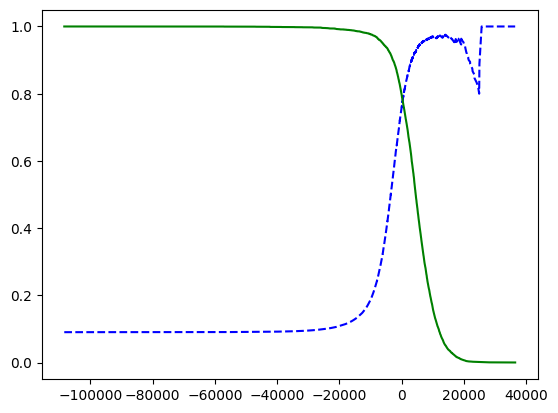

In [11]:
y_scores = cross_val_predict(sgd_clf, x_train, y_train_5, cv=3, method="decision_function")

from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
 plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
 plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()


In [13]:
from sklearn.svm import SVC
svc_clf = SVC()
svc_clf.fit(x_train, y_train)
svc_clf.predict([some_digit])

array([5], dtype=uint8)